In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install -q open3d

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.5 MB/s eta 0:00:00


In [ ]:
# %cd /content/drive/MyDrive/Capstone/Test3/Test3-2__git
%cd /content/drive/MyDrive/Colab_Notebooks/Test3-2__git

/content/drive/MyDrive/Colab_Notebooks/Test3-2__git


In [ ]:
!pip install yacs -q
!pip install gdown -q

In [ ]:
import os, sys, time
import argparse
import importlib
from tqdm.notebook import tqdm
from imageio import imread
import torch
import numpy as np
import matplotlib.pyplot as plt

### Download pretrained
- We use HoHoNet w/ hardnet encoder in this demo
- Download other version [here](https://drive.google.com/drive/folders/1raT3vRXnQXRAQuYq36dE-93xFc_hgkTQ?usp=sharing)

In [ ]:
PRETRAINED_PTH = 'ckpt/mp3d_layout_HOHO_layout_aug_efficienthc_Transen1_resnet34/ep300.pth'

if not os.path.exists(PRETRAINED_PTH):
    os.makedirs(os.path.split(PRETRAINED_PTH)[0], exist_ok=True)
    !gdown 'https://drive.google.com/uc?id=1OU9uyuNiswkPovJuvG3sevm3LqHJgazJ' -O $PRETRAINED_PTH

### Download image
- We use a out-of-distribution image from PanoContext

In [ ]:
!pip install Pillow==9.0.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 32.8 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
open3d 0.17.0 requires pillow>=9.3.0, but you have pillow 9.0.0 which is incompatible.


<ipython-input-57-b7b0565795ba>:4: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



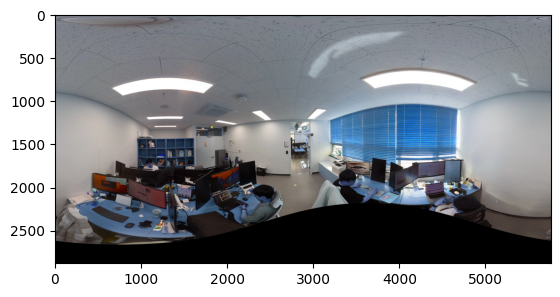

In [ ]:
if not os.path.exists('assets/pano_asmasuxybohhcj.png'):
    !gdown 'https://drive.google.com/uc?id=1CXl6RPK6yPRFXxsa5OisHV9KwyRcejHu' -O 'assets/pano_asmasuxybohhcj.png'

rgb = imread('/content/drive/MyDrive/Capstone/input/006/crop_pano/44304216.png')

plt.imshow(rgb)
plt.show()

### 230404 test

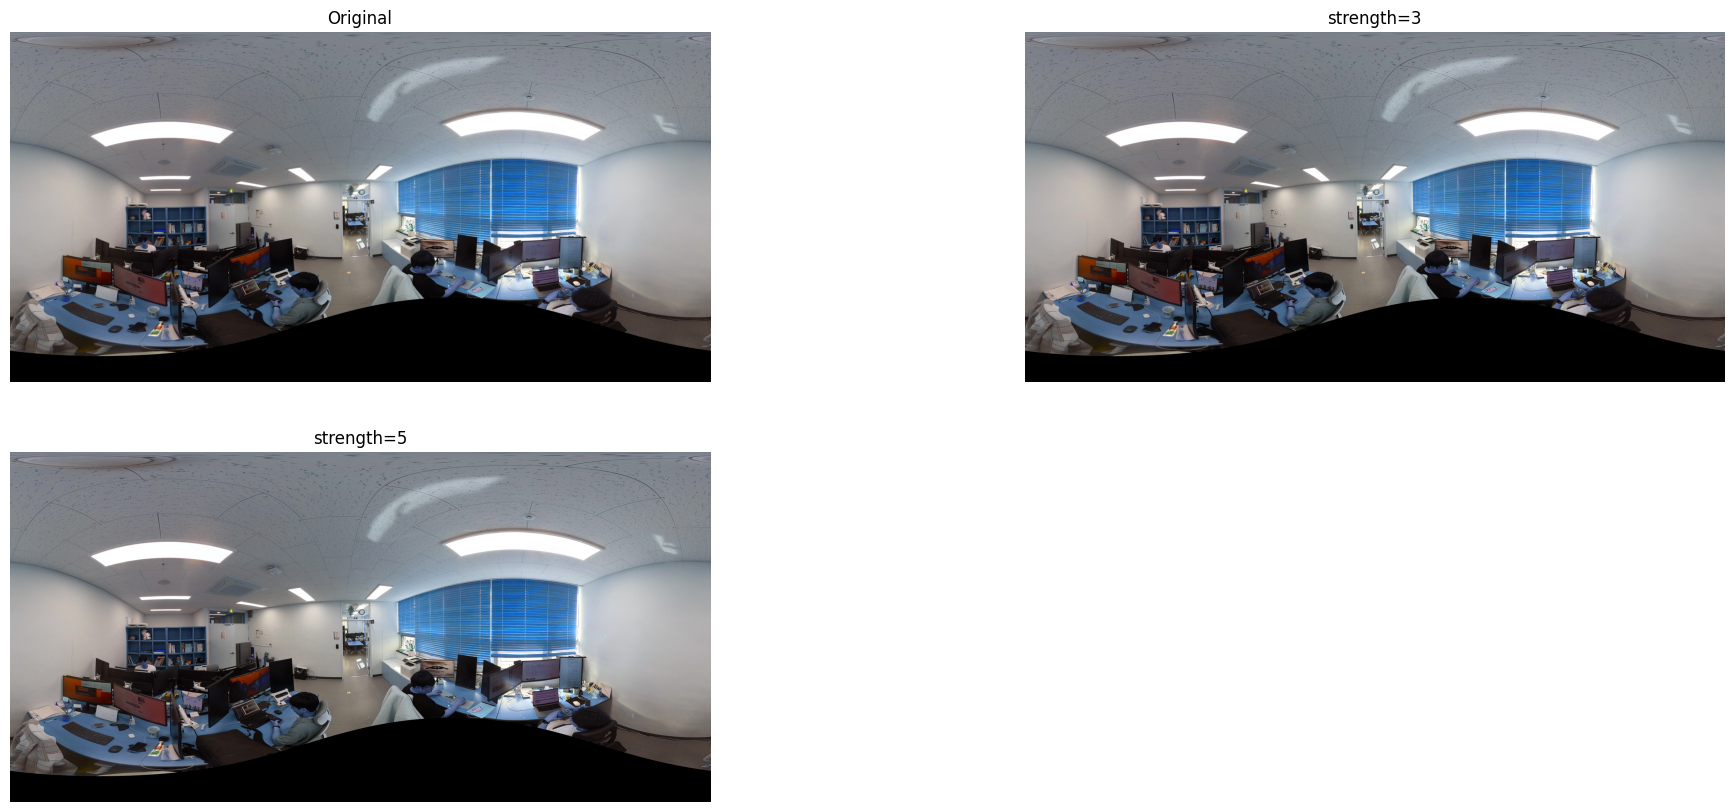

In [ ]:
# sharpening
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Image Load
image = io.imread('/content/drive/MyDrive/Capstone/input/006/crop_pano/44304216.png')
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sharpening function
def sharpening(image, strength):
    b = (1 - strength) / 8
    sharpening_kernel = np.array([[b, b, b],
                                  [b, strength, b],
                                  [b, b, b]])
    output = cv2.filter2D(image, -1, sharpening_kernel)
    return output

# Result
output1 = sharpening(image, strength=3)
output2 = sharpening(image, strength=5)

# view
plt.figure(figsize=(24,10))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(output1, cmap='gray')
plt.title('strength=3')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(output2, cmap='gray')
plt.title('strength=5')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Enhanced Color Image')

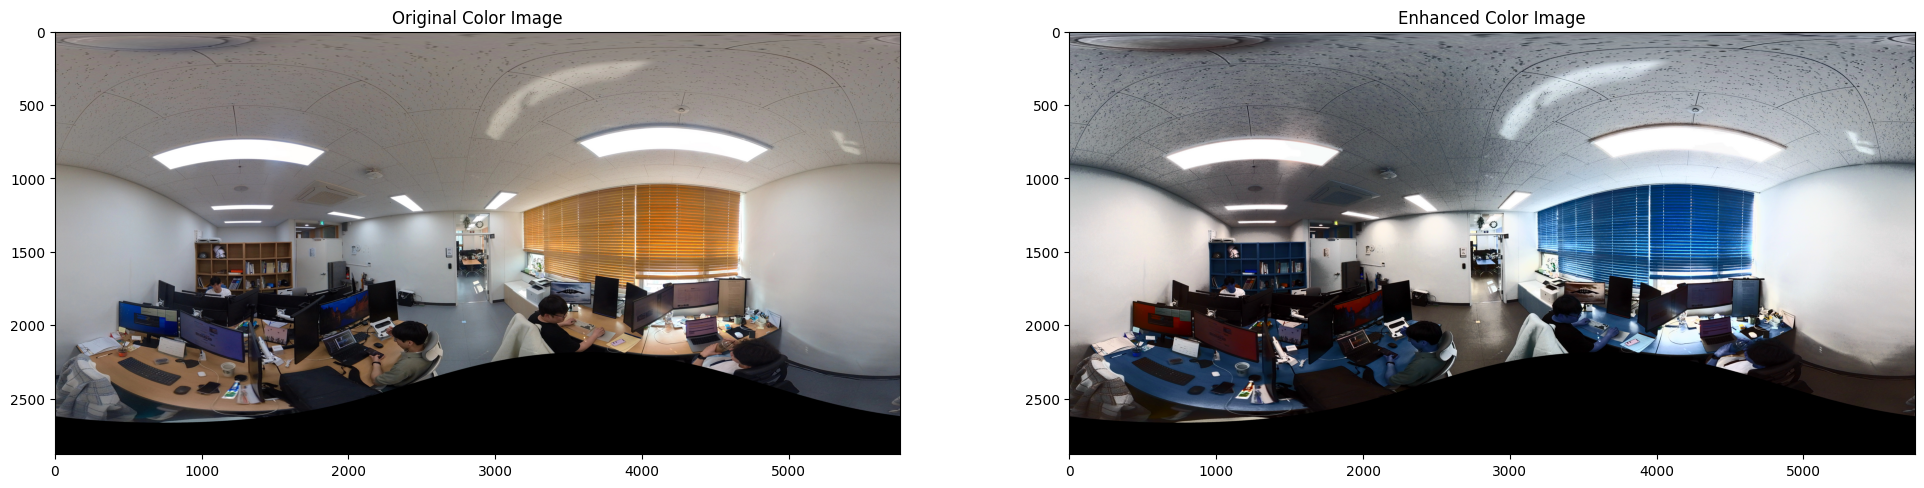

In [ ]:
# equalizaHist
image_bgr = cv2.imread('/content/drive/MyDrive/Capstone/input/006/crop_pano/44304216.png')

# YUV 컬로 포맷으로 변환
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# 히스토그램 평활화 적용
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# #RGB로 변환
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# plot
fig, ax = plt.subplots(1,2, figsize=(24, 10))
ax[0].imshow(image_bgr, cmap='gray')
ax[0].set_title('Original Color Image')
ax[1].imshow(image_rgb, cmap='gray')
ax[1].set_title('Enhanced Color Image')

In [ ]:
rgb = image_rgb

### input image resize

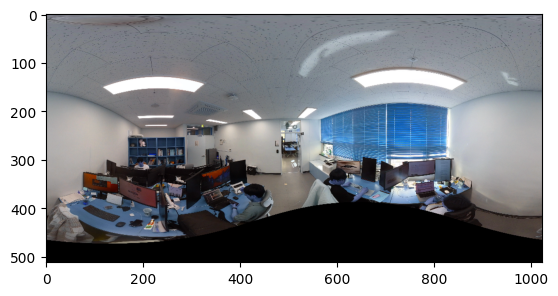

In [ ]:
import cv2
rgb = cv2.resize(rgb, (1024, 512), interpolation=cv2.INTER_LINEAR)
plt.imshow(rgb)
plt.show()

### Load model config
- We use HoHoNet w/ hardnet encoder in this demo
- Find out other version in `mp3d_depth/` and `s2d3d_depth`

In [ ]:
from lib.config import config

config.defrost()
config.merge_from_file('config/mp3d_layout/HOHO_layout_aug_efficienthc_Transen1_resnet34.yaml')
config.freeze()

### Load model

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('devcie:', device)

model_file = importlib.import_module(config.model.file)
model_class = getattr(model_file, config.model.modelclass)
net = model_class(**config.model.kwargs)
net.load_state_dict(torch.load(PRETRAINED_PTH, map_location=device))
net = net.eval().to(device)

devcie: cpu


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 94.1MB/s]


### Move image into tensor, normzlie to [0, 255], resize to 512x1024

In [ ]:
x = torch.from_numpy(rgb).permute(2,0,1)[None].float() / 255.
if x.shape[2:] != (512, 1024):
    x = torch.nn.functional.interpolate(x, size=(512, 1024), mode='area')
    print("fitting")
x = x.to(device)

### Model feedforward

In [ ]:
with torch.no_grad():
    ts = time.time()
    layout = net.infer(x)
    if torch.cuda.is_available():
        torch.cuda.synchronize()
    print(f'Eps time: {time.time() - ts:.2f} sec.')

cor_id = layout['cor_id']
y_bon_ = layout['y_bon_']
y_cor_ = layout['y_cor_']

Eps time: 1.69 sec.


In [ ]:
print(type(layout))
print(layout)

<class 'dict'>
{'cor_id': array([[223.13266, 232.91037],
       [223.13266, 302.03738],
       [277.29053, 232.66629],
       [277.29053, 302.51917],
       [283.68805, 226.1489 ],
       [283.68805, 315.13184],
       [360.65048, 231.60571],
       [360.65048, 304.60507],
       [573.18304, 218.9372 ],
       [573.18304, 328.46136],
       [884.50287, 184.54843],
       [884.50287, 381.75412]], dtype=float32), 'y_bon_': array([[153.58395, 154.83252, 154.99036, ..., 151.3962 , 151.85541,
        152.50531],
       [414.61108, 414.9279 , 413.90723, ..., 418.1231 , 417.9585 ,
        414.258  ]], dtype=float32), 'y_cor_': array([0.0012345 , 0.00120866, 0.00123076, ..., 0.0009498 , 0.00095518,
       0.00106508], dtype=float32)}


In [ ]:
print(layout.keys())

dict_keys(['cor_id', 'y_bon_', 'y_cor_'])


In [ ]:
print(type(cor_id))
print(cor_id.shape)
cor_id # 모서리의 위치

<class 'numpy.ndarray'>
(12, 2)


array([[223.13266, 232.91037],
       [223.13266, 302.03738],
       [277.29053, 232.66629],
       [277.29053, 302.51917],
       [283.68805, 226.1489 ],
       [283.68805, 315.13184],
       [360.65048, 231.60571],
       [360.65048, 304.60507],
       [573.18304, 218.9372 ],
       [573.18304, 328.46136],
       [884.50287, 184.54843],
       [884.50287, 381.75412]], dtype=float32)

In [ ]:
print(type(y_bon_))
print(y_bon_.shape)
y_bon_ # 지평선의 y좌표값

<class 'numpy.ndarray'>
(2, 1024)


array([[153.58395, 154.83252, 154.99036, ..., 151.3962 , 151.85541,
        152.50531],
       [414.61108, 414.9279 , 413.90723, ..., 418.1231 , 417.9585 ,
        414.258  ]], dtype=float32)

### Visualize result in 2d

In [ ]:
from eval_layout import layout_2_depth

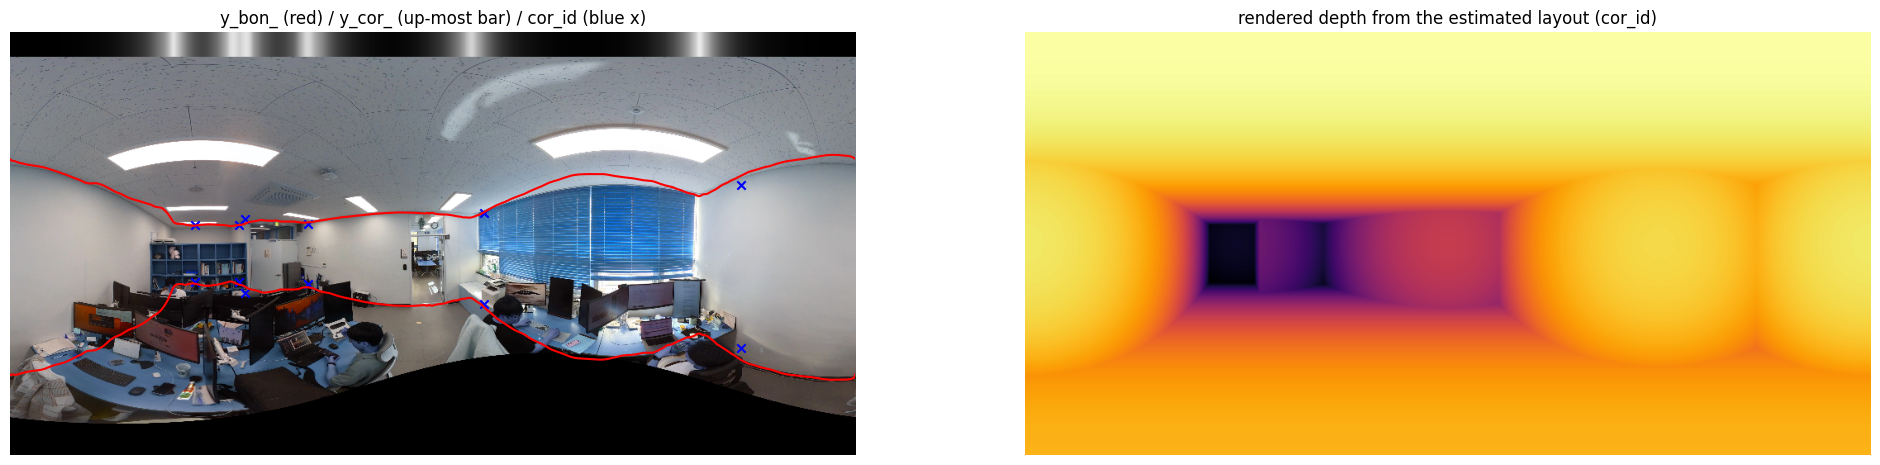

In [ ]:
plt.figure(figsize=(24,10))

plt.subplot(121)
plt.imshow(np.concatenate([
    (y_cor_ * 255).reshape(1,-1,1).repeat(30, 0).repeat(3, 2).astype(np.uint8),
    rgb[30:]
], 0))
plt.plot(np.arange(y_bon_.shape[1]), y_bon_[0], 'r-')
plt.plot(np.arange(y_bon_.shape[1]), y_bon_[1], 'r-')
plt.scatter(cor_id[:, 0], cor_id[:, 1], marker='x', c='b')
plt.axis('off')
plt.title('y_bon_ (red) / y_cor_ (up-most bar) / cor_id (blue x)')

plt.subplot(122)
plt.imshow(layout_2_depth(cor_id, *rgb.shape[:2]), cmap='inferno_r')
plt.axis('off')
plt.title('rendered depth from the estimated layout (cor_id)')

plt.show()

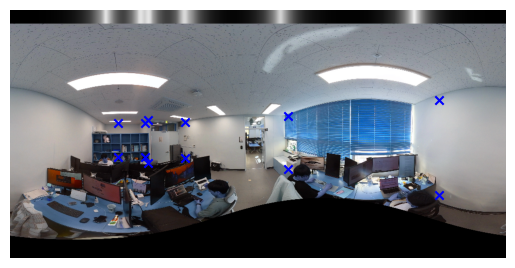

In [ ]:
plt.imshow(np.concatenate([
    (y_cor_ * 255).reshape(1,-1,1).repeat(30, 0).repeat(3, 2).astype(np.uint8),
    rgb[30:]
], 0))
# plt.plot(np.arange(y_bon_.shape[1]), y_bon_[0], 'r-')
# plt.plot(np.arange(y_bon_.shape[1]), y_bon_[1], 'r-')
plt.scatter(cor_id[:, 0], cor_id[:, 1], marker='x', c='b')
plt.axis('off')
# rgb = plt.gca().get_images()[0].get_array()

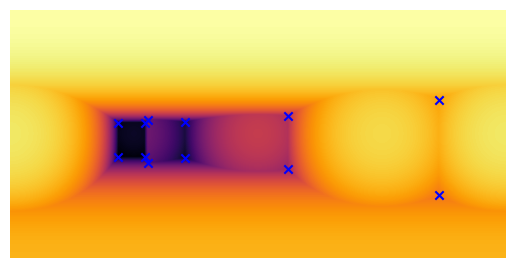

x, y, depth
223.13266 232.91037 5.291093
223.13266 302.03738 5.656843
277.29053 232.66629 5.291092
277.29053 302.51917 5.61688
283.68805 226.1489 4.2233725
283.68805 315.13184 4.481404
360.65048 231.60571 5.07666
360.65048 304.60507 5.3691792
573.18304 218.9372 3.3336115
573.18304 328.46136 3.689525
884.50287 184.54843 1.789878
884.50287 381.75412 2.2709782


<ipython-input-43-53002e68013e>:8: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
# layout['cor_id'] -> depth map 값 알아내기

plt.imshow(layout_2_depth(cor_id, *rgb.shape[:2]), cmap='inferno_r')
plt.scatter(cor_id[:, 0], cor_id[:, 1], marker='x', c='b')
plt.axis('off')
plt.show()

depth_values = layout_2_depth(cor_id, *rgb.shape[:2])[cor_id[:, 1].astype(np.int), cor_id[:, 0].astype(np.int)]

print('x, y, depth')
for i in range(cor_id.shape[0]):
  print(cor_id[i, 0], cor_id[i, 1], depth_values[i])

### 230404 test

Text(0.5, 1.0, 't* y_bon_ (red) / y_cor_ (up-most bar) / cor_id (blue x)')

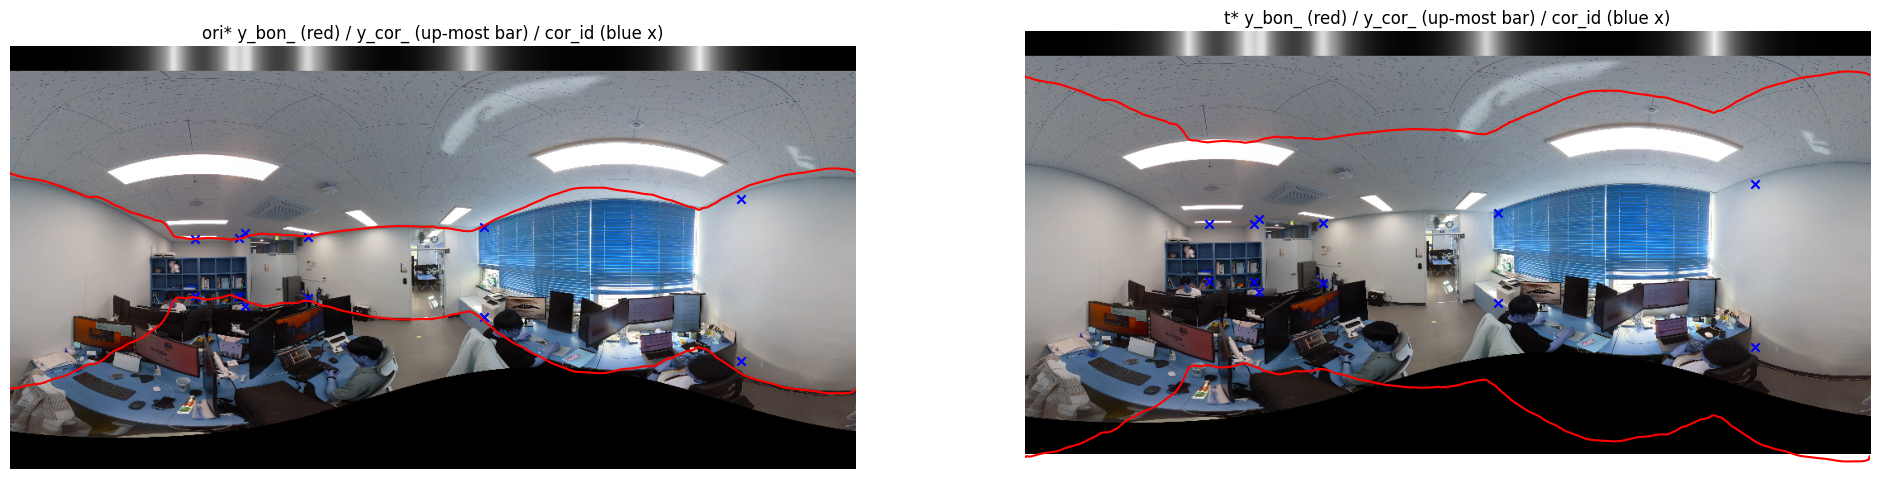

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(121)
plt.imshow(np.concatenate([
    (y_cor_ * 255).reshape(1,-1,1).repeat(30, 0).repeat(3, 2).astype(np.uint8),
    rgb[30:]
], 0))
plt.plot(np.arange(y_bon_.shape[1]), y_bon_[0], 'r-')
plt.plot(np.arange(y_bon_.shape[1]), y_bon_[1], 'r-')
plt.scatter(cor_id[:, 0], cor_id[:, 1], marker='x', c='b')
plt.axis('off')
plt.title('ori* y_bon_ (red) / y_cor_ (up-most bar) / cor_id (blue x)')

plt.subplot(122)
plt.imshow(np.concatenate([
    (y_cor_ * 255).reshape(1,-1,1).repeat(30, 0).repeat(3, 2).astype(np.uint8),
    rgb[30:]
], 0))
plt.plot(np.arange(y_bon_.shape[1]), y_bon_[0]-100, 'r-')
plt.plot(np.arange(y_bon_.shape[1]), y_bon_[1]+100, 'r-')
plt.scatter(cor_id[:, 0], cor_id[:, 1], marker='x', c='b')
plt.axis('off')
plt.title('t* y_bon_ (red) / y_cor_ (up-most bar) / cor_id (blue x)')

In [ ]:
# densenet121

import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device:', device)

# 모델 로드
model = torch.hub.load('pytorch/vision', 'densenet121', pretrained=True)
model.to(device)
model.eval()

# 이미지 로드
img_path = '/content/drive/MyDrive/Capstone/input/006/crop_pano/44304216.png'
img = Image.open(img_path).convert('RGB')
img = img.resize((1024, 512))

# 이미지 변환
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(0)
img_tensor = img_tensor.to(device)

# 모델 예측
with torch.no_grad():
    output = model(img_tensor)

# 모델 출력 크기와 입력 이미지의 크기 맞추기
# output = output.cpu().numpy()
# output = output.squeeze()
# output = output[:img.size[0]]

# 지평선 위치 예측
y_bon_ = output.cpu().numpy()[0]

# 시각화
import matplotlib.pyplot as plt

# 이미지 로드 (다시)
img = Image.open(img_path).convert('RGB')
img = img.resize((1024, 512))

# 지평선 시각화
# plt.imshow(img)
# plt.plot(np.arange(y_bon_.shape[0]), y_bon_, 'r-')
# plt.axis('off')
print(y_bon_.shape)
print(y_bon_[0])
print(y_bon_[1])

device: cpu


Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(1000,)
-3.4000452
0.45166558


ValueError: ignored

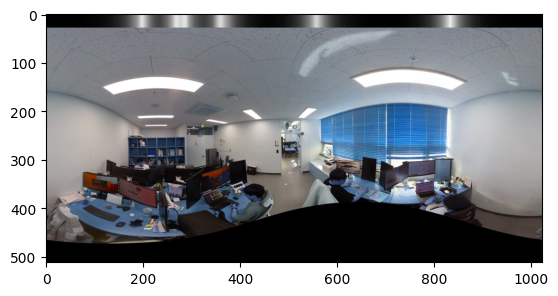

In [ ]:
# 지평선 시각화
plt.imshow(np.concatenate([
    (y_cor_ * 255).reshape(1,-1,1).repeat(30, 0).repeat(3, 2).astype(np.uint8),
    np.array(img)[30:]
], 0))
plt.plot(np.arange(y_bon_.shape[0]), y_bon_[0], 'r-')
# plt.plot(np.arange(y_bon_.shape[1]), y_bon_[1], 'r-')
plt.scatter(cor_id[:, 0], cor_id[:, 1], marker='x', c='b')
plt.axis('off')
plt.title('y_bon_ (red) / y_cor_ (up-most bar) / cor_id (blue x)')
plt.show()

In [ ]:
# resnet50

import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# 디바이스 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device:', device)

# 모델 로드
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet50', pretrained=True)
model.to(device)
model.eval()

# 이미지 로드
img_path = '/content/drive/MyDrive/Capstone/input/006/crop_pano/44304216.png'
img = Image.open(img_path).convert('RGB')
img = img.resize((224, 224))

# 이미지 변환
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(0)
img_tensor = img_tensor.to(device)

# 모델 예측
with torch.no_grad():
    features = model.conv1(img_tensor)
    features = model.bn1(features)
    features = model.relu(features)
    features = model.maxpool(features)
    features = model.layer1(features)
    features = model.layer2(features)
    features = model.layer3(features)
    features = model.layer4(features)
    output = model.avgpool(features)
    output = output.view(output.size(0), -1)

# 지평선 위치 예측
W = output.size(1)
y = output.cpu().numpy()[0]
x = np.arange(W)
# y_bon_ = (y * x).sum() / y.sum()
y_bon_ = y

# 시각화
import matplotlib.pyplot as plt

# 이미지 로드 (다시)
img = Image.open(img_path).convert('RGB')
img = img.resize((224, 224))

# 지평선 시각화
# plt.imshow(img)
# plt.plot(np.arange(y.shape[0]), y, 'r-')
# plt.axvline(x=y_bon_, color='r')
# plt.axis('off')
# plt.show()

device: cpu


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
y_bon_.shape

(2048,)

In [ ]:
plt.imshow(np.concatenate([
    (y_cor_ * 255).reshape(1,-1,1).repeat(30, 0).repeat(3, 2).astype(np.uint8),
    np.array(img)[30:]
], 0))
plt.plot(np.arange(y_bon_.shape[0]), y_bon_[0], 'r-')
# plt.plot(np.arange(y_bon_.shape[1]), y_bon_[1], 'r-')
plt.scatter(cor_id[:, 0], cor_id[:, 1], marker='x', c='b')
plt.axis('off')
plt.title('y_bon_ (red) / y_cor_ (up-most bar) / cor_id (blue x)')
plt.show()

ValueError: ignored

### Visualize result as 3d mesh

In [ ]:
!pip install plotly -q

In [ ]:
import open3d as o3d
import plotly.graph_objects as go
from scipy.signal import correlate2d
from scipy.ndimage import shift
from skimage.transform import resize

from lib.misc.post_proc import np_coor2xy, np_coorx2u, np_coory2v

In [ ]:
H, W = 256, 512
ignore_floor = False
ignore_ceiling = True
ignore_wall = False

In [ ]:
# Convert corners to layout
depth, floor_mask, ceil_mask, wall_mask = [
    resize(v, [H, W], order=0, preserve_range=True).astype(v.dtype)
    for v in layout_2_depth(cor_id, *rgb.shape[:2], return_mask=True)]
coorx, coory = np.meshgrid(np.arange(W), np.arange(H)) # 이미지의 모든 좌표를 생성
us = np_coorx2u(coorx, W)
vs = np_coory2v(coory, H)
zs = depth * np.sin(vs)
cs = depth * np.cos(vs)
xs = cs * np.sin(us)
ys = -cs * np.cos(us) 

# Aggregate mask
mask = np.ones_like(floor_mask)
if ignore_floor:
    mask &= ~floor_mask
if ignore_ceiling:
    mask &= ~ceil_mask
if ignore_wall:
    mask &= ~wall_mask

# Prepare ply's points and faces
xyzrgb = np.concatenate([
    xs[...,None], ys[...,None], zs[...,None],
    resize(rgb, [H, W])], -1)
xyzrgb = np.concatenate([xyzrgb, xyzrgb[:,[0]]], 1)
mask = np.concatenate([mask, mask[:,[0]]], 1)
lo_tri_template = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 1, 1]])
up_tri_template = np.array([
    [0, 0, 0],
    [0, 1, 1],
    [0, 0, 1]])
ma_tri_template = np.array([
    [0, 0, 0],
    [0, 1, 1],
    [0, 1, 0]])
lo_mask = (correlate2d(mask, lo_tri_template, mode='same') == 3)
up_mask = (correlate2d(mask, up_tri_template, mode='same') == 3)
ma_mask = (correlate2d(mask, ma_tri_template, mode='same') == 3) & (~lo_mask) & (~up_mask)
ref_mask = (
    lo_mask | (correlate2d(lo_mask, np.flip(lo_tri_template, (0,1)), mode='same') > 0) |\
    up_mask | (correlate2d(up_mask, np.flip(up_tri_template, (0,1)), mode='same') > 0) |\
    ma_mask | (correlate2d(ma_mask, np.flip(ma_tri_template, (0,1)), mode='same') > 0)
)
points = xyzrgb[ref_mask] # xs, ys, zs를 각각 x, y, z 좌표로 하는 3D 점

ref_id = np.full(ref_mask.shape, -1, np.int32)
ref_id[ref_mask] = np.arange(ref_mask.sum())
faces_lo_tri = np.stack([
    ref_id[lo_mask],
    ref_id[shift(lo_mask, [1, 0], cval=False, order=0)],
    ref_id[shift(lo_mask, [1, 1], cval=False, order=0)],
], 1)
faces_up_tri = np.stack([
    ref_id[up_mask],
    ref_id[shift(up_mask, [1, 1], cval=False, order=0)],
    ref_id[shift(up_mask, [0, 1], cval=False, order=0)],
], 1)
faces_ma_tri = np.stack([
    ref_id[ma_mask],
    ref_id[shift(ma_mask, [1, 0], cval=False, order=0)],
    ref_id[shift(ma_mask, [0, 1], cval=False, order=0)],
], 1)
faces = np.concatenate([faces_lo_tri, faces_up_tri, faces_ma_tri])

In [ ]:
print(points)
print(points.shape) # xyzrgb

[[-6.58430354e-03  1.07306118e+00  7.45941191e-01  4.30999504e-01
   4.62185683e-01  5.00127075e-01]
 [-1.97556360e-02  1.07310147e+00  7.46081563e-01  4.44005455e-01
   4.72531051e-01  5.04637600e-01]
 [-3.29339147e-02  1.07314190e+00  7.46334476e-01  4.52638113e-01
   4.79330921e-01  5.09245878e-01]
 ...
 [ 1.80708819e-04  9.81587739e-03 -1.59999029e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.02392971e-05  9.81735585e-03 -1.59999029e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.02392971e-05  9.81735585e-03 -1.59999029e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(81894, 6)


In [ ]:
def obj_info(obj):
  print("type: ", type(obj))
  print("shape: ", obj.shape)

In [ ]:
obj_info(points)
obj_info(faces_lo_tri)
obj_info(faces_up_tri)
obj_info(faces_ma_tri)
obj_info(faces)

type:  <class 'numpy.ndarray'>
shape:  (81894, 6)
type:  <class 'numpy.ndarray'>
shape:  (81204, 3)
type:  <class 'numpy.ndarray'>
shape:  (81153, 3)
type:  <class 'numpy.ndarray'>
shape:  (0, 3)
type:  <class 'numpy.ndarray'>
shape:  (162357, 3)


In [ ]:
fig = go.Figure(
    data=[
        go.Mesh3d(
            x=points[:,0],
            y=points[:,1],
            z=points[:,2],
            i=faces[:,0],
            j=faces[:,1],
            k=faces[:,2],
            facecolor=points[:,3:][faces[:,0]])
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)
fig.show()

In [ ]:
# layout['cor_id'] -> depth map 값 알아내기 -> 3d 좌표값 

coorx, coory = np.meshgrid(np.arange(W), np.arange(H))
us = np_coorx2u(coorx, W)
vs = np_coory2v(coory, H)
zs = depth * np.sin(vs)
cs = depth * np.cos(vs)
xs = cs * np.sin(us)
ys = -cs * np.cos(us)

points = np.stack([xs, ys, zs], axis=-1)
points = np.concatenate([points, np.ones([H, W, 1])], -1)
points = np.reshape(points, [-1, 4]) # 3D 구조물의 각 점들의 좌표

array([[-2.86260695e-05,  4.66526544e-03,  7.60324828e-01,
         1.00000000e+00],
       [-8.58738974e-05,  4.66456287e-03,  7.60324828e-01,
         1.00000000e+00],
       [-1.43108793e-04,  4.66315783e-03,  7.60324828e-01,
         1.00000000e+00],
       ...,
       [ 3.01151128e-04,  9.81292070e-03, -1.59999029e+00,
         1.00000000e+00],
       [ 1.80708819e-04,  9.81587739e-03, -1.59999029e+00,
         1.00000000e+00],
       [ 6.02392971e-05,  9.81735585e-03, -1.59999029e+00,
         1.00000000e+00]])

In [ ]:
points.shape # xyzc

(131072, 4)

In [ ]:
points[0]

array([-2.86260695e-05,  4.66526544e-03,  7.60324828e-01,  1.00000000e+00])

#Turn layout to opnen3d mesh

In [ ]:
# Prepare vertices and faces
vertices = o3d.utility.Vector3dVector(points[:, :3])
colors = o3d.utility.Vector3dVector(points[:, 3:] / 255.0)
triangles = o3d.utility.Vector3iVector(faces)

# Create mesh object
mesh = o3d.geometry.TriangleMesh()
mesh.vertices = vertices
mesh.vertex_colors = colors
mesh.triangles = triangles
mesh.compute_vertex_normals()

# Visualize mesh
o3d.visualization.draw_plotly([mesh])


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
%pwd

'/content/drive/MyDrive/Capstone/Test3/Test3-2__git'

In [ ]:
# Save mesh to file
o3d.io.write_triangle_mesh("/content/drive/MyDrive/Capstone/input/004_LotteCastle_1_Management_Office/Layout/270_mesh.obj", mesh)


NameError: ignored

#get pcd and align to mesh

In [ ]:
import open3d as o3d

# Load mesh from previous step
# mesh = o3d.io.read_triangle_mesh('mesh.ply')

# Load point cloud from .pcd file
pcd = o3d.io.read_point_cloud('assets/snapshot.pcd')

# Apply translation to point cloud if necessary
# pcd.translate([x, y, z])

# Downsample point cloud if necessary
# downsampled_pcd = pcd.voxel_down_sample(voxel_size=0.05)

# Convert the mesh to a point cloud
mesh_pcd = mesh.sample_points_uniformly(number_of_points=10000)


In [ ]:
# Visualize mesh
o3d.visualization.draw_plotly([mesh_pcd, pcd])


In [ ]:
# Set the initial transformation to the identity matrix
init = np.identity(4)

# Run the registration
reg_p2p = o3d.pipelines.registration.registration_icp(
    source=mesh_pcd, target=pcd, max_correspondence_distance=0.02,
    init=init, estimation_method=o3d.pipelines.registration.TransformationEstimationPointToPoint(),
    criteria=o3d.pipelines.registration.ICPConvergenceCriteria(relative_fitness=1e-6, relative_rmse=1e-6, max_iteration=30))


In [ ]:
# Get the transformation matrix
transformation_matrix = reg_p2p.transformation


In [ ]:
transformation_matrix


array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.78405904e-02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -1.28579476e-04],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         5.46139208e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [ ]:

# Transform the mesh using the transformation matrix
mesh.transform(transformation_matrix)


TriangleMesh with 95016 points and 188579 triangles.

In [ ]:
# Visualize pcd
o3d.visualization.draw_plotly([pcd, mesh])


Output hidden; open in https://colab.research.google.com to view.

In [ ]:


# Save the PointCloud object to a .pcd file
o3d.io.write_point_cloud("assets/snapshot_src.pcd", mesh_pcd)
